#Importação

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/mateacademy_python/Projeto Final

/content/drive/MyDrive/mateacademy_python/Projeto Final


In [4]:
df_countries = pd.read_csv("countries.csv")
df_events = pd.read_csv("events.csv")
df_products = pd.read_csv("products.csv")

In [5]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [6]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


In [7]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


#Tratamento de Dados

###Eliminando nulos

Estou excluindo os nulos devido a porcentagem ser muito baixa em relação ao número total do conjunto de dados.

In [8]:
df_events = df_events.dropna()
df_events.isnull().sum()

,0
Order ID,0
Order Date,0
Ship Date,0
Order Priority,0
Country Code,0
Product ID,0
Sales Channel,0
Units Sold,0
Unit Price,0
Unit Cost,0


In [9]:
df_countries = df_countries.dropna()
df_countries.isnull().sum()

,0
name,0
alpha-2,0
alpha-3,0
region,0
sub-region,0


In [10]:
df_products = df_products.dropna()
df_products.isnull().sum()

,0
id,0
item_type,0


In [11]:
df_events['Order Date'] = pd.to_datetime(df_events['Order Date'])
df_events['Ship Date'] = pd.to_datetime(df_events['Ship Date'])

In [12]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1246 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1246 non-null   int64         
 1   Order Date      1246 non-null   datetime64[ns]
 2   Ship Date       1246 non-null   datetime64[ns]
 3   Order Priority  1246 non-null   object        
 4   Country Code    1246 non-null   object        
 5   Product ID      1246 non-null   int64         
 6   Sales Channel   1246 non-null   object        
 7   Units Sold      1246 non-null   float64       
 8   Unit Price      1246 non-null   float64       
 9   Unit Cost       1246 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 107.1+ KB


###Renomeando colunas para Merge

In [13]:
df_events.rename(columns={'Product ID': 'product_id', 'Country Code': 'country_code'}, inplace=True)
df_countries.rename(columns={'alpha-3': 'country_code'}, inplace=True)
df_products.rename(columns={'id': 'product_id'}, inplace=True)

In [14]:
df_products.head(2)

,product_id,item_type
0,2103,Cereal
1,7940,Household


In [15]:
df_countries.head(2)

,name,alpha-2,country_code,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe


In [16]:
df_events.head(2)

,Order ID,Order Date,Ship Date,Order Priority,country_code,product_id,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.7,117.11
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.7,117.11


In [17]:
df = df_events.merge(df_products, how="left", on="product_id").merge(df_countries, how="left", on="country_code")
df.head()

,Order ID,Order Date,Ship Date,Order Priority,country_code,product_id,Sales Channel,Units Sold,Unit Price,Unit Cost,item_type,name,alpha-2,region,sub-region
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Cereal,Norway,NO,Europe,Northern Europe
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Cereal,Serbia,RS,Europe,Southern Europe
2,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Clothes,Montenegro,ME,Europe,Southern Europe
3,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Beverages,Serbia,RS,Europe,Southern Europe
4,103450715,2015-03-15,2015-04-18,H,SVK,8681,Online,2220.0,651.21,524.96,Office Supplies,Slovakia,SK,Europe,Eastern Europe


In [18]:
num_duplicatas = df.duplicated().sum()
print(num_duplicatas)

0


In [19]:
columns_to_drop = ['country_code', 'product_id', 'alpha-2', 'sub-region']
df = df.drop(columns=columns_to_drop)
display(df.head())

,Order ID,Order Date,Ship Date,Order Priority,Sales Channel,Units Sold,Unit Price,Unit Cost,item_type,name,region
0,100640618,2014-10-08,2014-10-18,M,Online,650.0,205.70,117.11,Cereal,Norway,Europe
1,100983083,2016-08-11,2016-08-11,C,Offline,1993.0,205.70,117.11,Cereal,Serbia,Europe
2,102230632,2017-05-13,2017-06-13,L,Online,1171.0,109.28,35.84,Clothes,Montenegro,Europe
3,103435266,2012-08-11,2012-09-18,H,Offline,7648.0,47.45,31.79,Beverages,Serbia,Europe
4,103450715,2015-03-15,2015-04-18,H,Online,2220.0,651.21,524.96,Office Supplies,Slovakia,Europe


#Análises e Visualizações

###Métricas-chave

In [20]:
total_orders = df['Order ID'].nunique()
total_profit = (df['Units Sold'] * (df['Unit Price'] - df['Unit Cost'])).sum()
total_countries = df['name'].nunique()

print(f"Número Total de Pedidos: {total_orders}")
print(f"Lucro Total: R${total_profit:,.2f}")
print(f"Número de países: {total_countries}")

Número Total de Pedidos: 1246
Lucro Total: R$473,709,035.06
Número de países: 45


##Vendas por Categoria, País, Região e Canal de Vendas

###Vendas por Categoria

In [21]:
df['Revenue'] = df['Units Sold'] * df['Unit Price']
df['Cost'] = df['Units Sold'] * df['Unit Cost']
df['Profit'] = df['Revenue'] - df['Cost']

category_sales = df.groupby('item_type')[['Revenue', 'Cost', 'Profit']].sum().reset_index()
display(category_sales)

,item_type,Revenue,Cost,Profit
0,Baby Food,1.338344e+08,8.357833e+07,50256042.90
1,Beverages,2.742567e+07,1.837433e+07,9051339.06
2,Cereal,9.467672e+07,5.390175e+07,40774964.94
3,Clothes,6.330732e+07,2.076258e+07,42544746.72
4,Cosmetics,2.213054e+08,1.332945e+08,88010907.56
5,Fruits,4.955490e+06,3.675454e+06,1280035.35
6,Household,2.788744e+08,2.097140e+08,69160454.84
7,Meat,2.013398e+08,1.740421e+08,27297727.60
8,Office Supplies,3.786662e+08,3.052543e+08,73411976.25
9,Personal Care,4.334632e+07,3.005550e+07,13290821.60


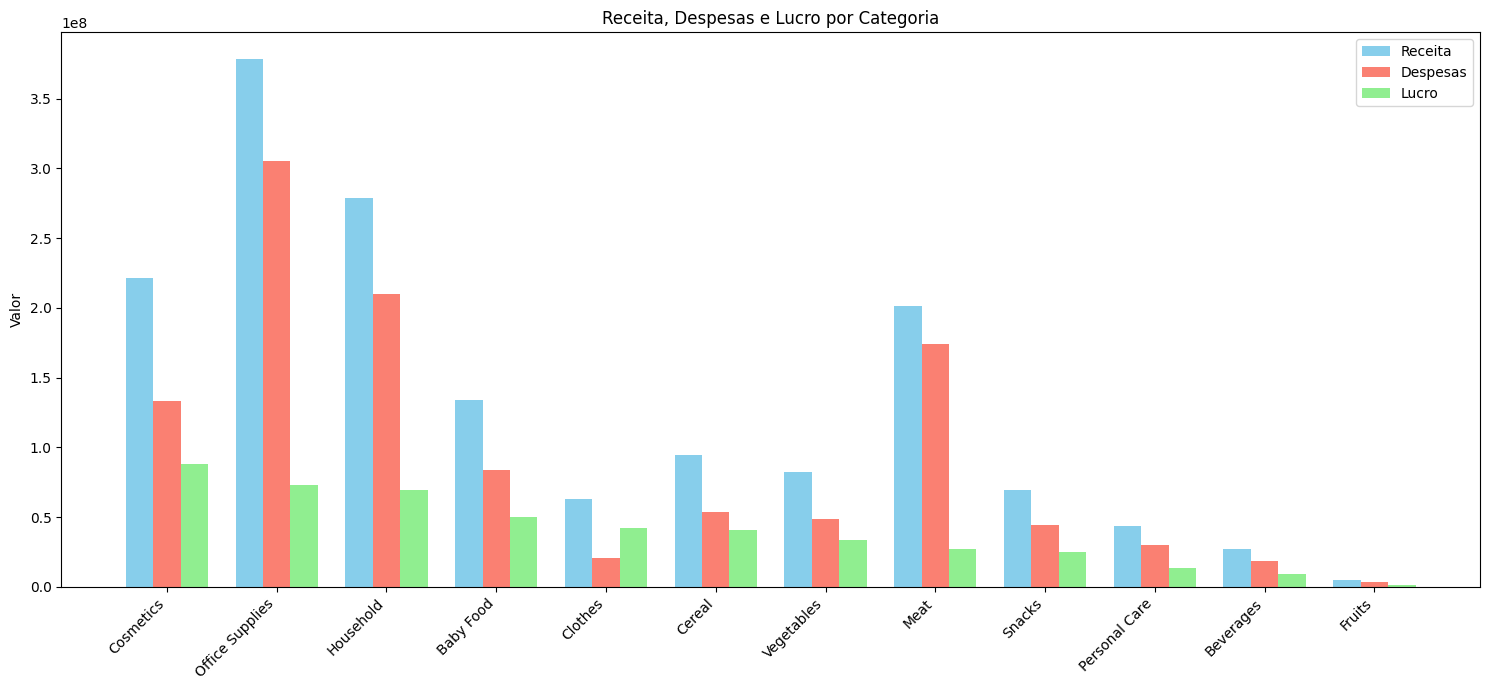

In [22]:
category_agg = df.groupby('item_type')[['Revenue', 'Cost', 'Profit']].sum().reset_index()
category_agg = category_agg.sort_values(by='Profit', ascending=False)

x = np.arange(len(category_agg['item_type']))
w = 0.25

fig, ax = plt.subplots(figsize=(15, 7))

rects1 = ax.bar(x - w, category_agg['Revenue'], w, label='Receita', color='skyblue')
rects2 = ax.bar(x, category_agg['Cost'], w, label='Despesas', color='salmon')
rects3 = ax.bar(x + w, category_agg['Profit'], w, label='Lucro', color='lightgreen')

ax.set_ylabel('Valor')
ax.set_title('Receita, Despesas e Lucro por Categoria')
ax.set_xticks(x)
ax.set_xticklabels(category_agg['item_type'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

###Vendas por País


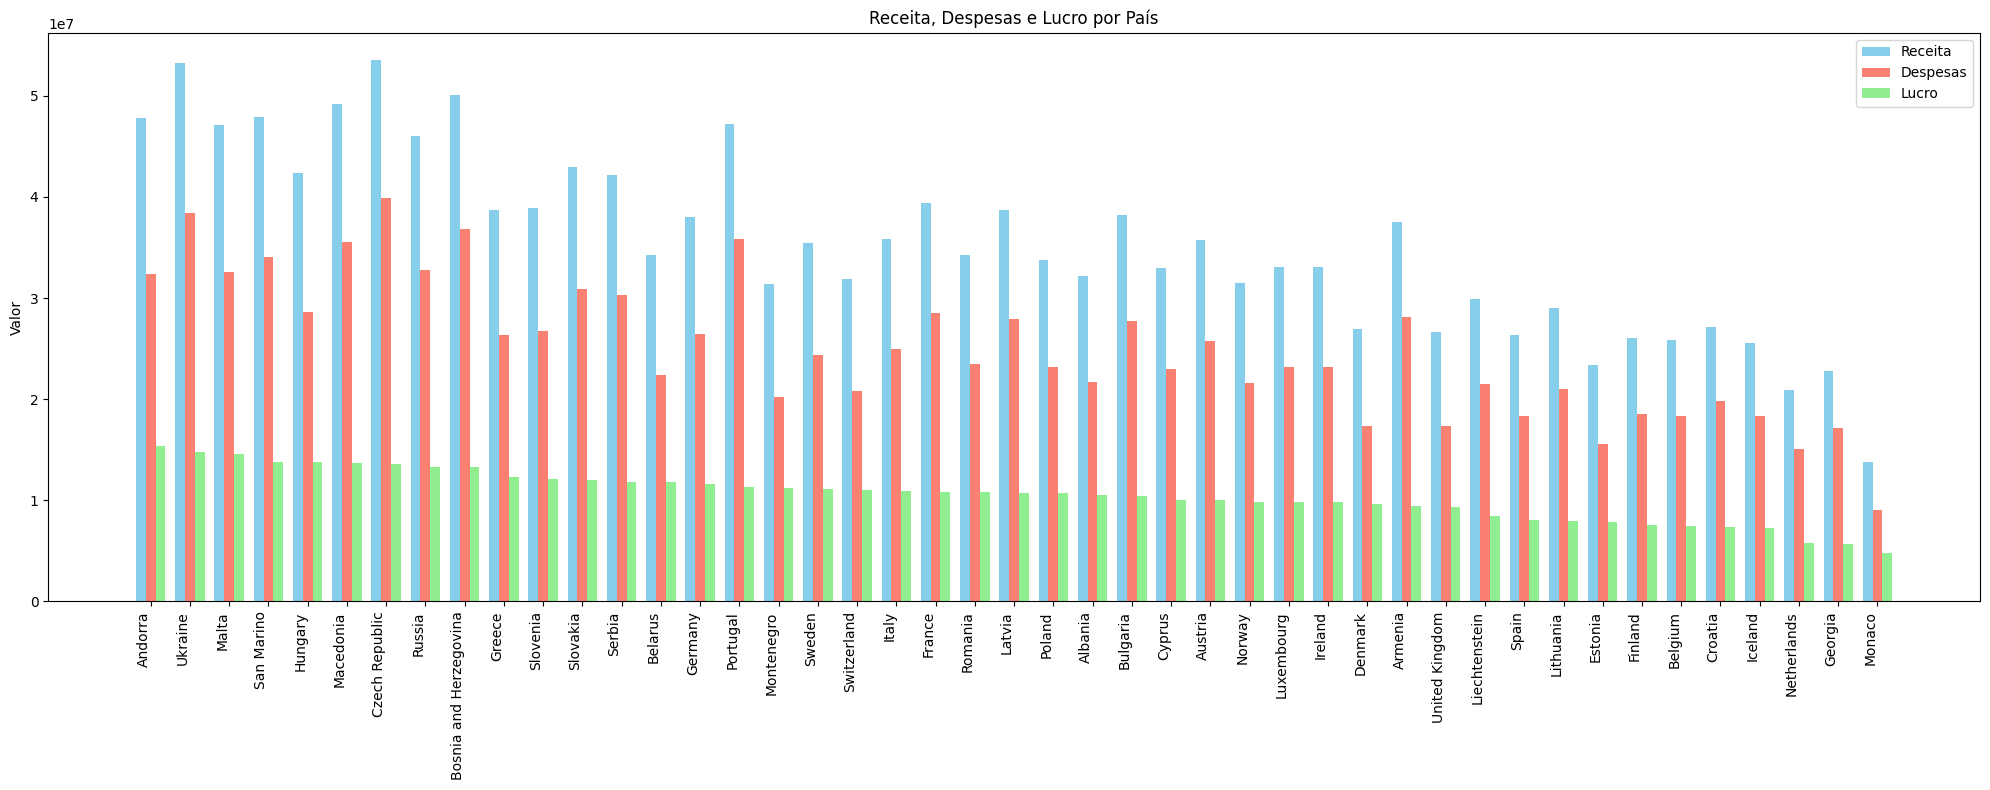

In [23]:
country_agg = df.groupby('name')[['Revenue', 'Cost', 'Profit']].sum().reset_index()
country_agg = country_agg.sort_values(by='Profit', ascending=False)

x = np.arange(len(country_agg['name']))
w = 0.25

fig, ax = plt.subplots(figsize=(20, 8))

rects1 = ax.bar(x - w, country_agg['Revenue'], w, label='Receita', color='skyblue')
rects2 = ax.bar(x, country_agg['Cost'], w, label='Despesas', color='salmon')
rects3 = ax.bar(x + w, country_agg['Profit'], w, label='Lucro', color='lightgreen')

ax.set_ylabel('Valor')
ax.set_title('Receita, Despesas e Lucro por País')
ax.set_xticks(x)
ax.set_xticklabels(country_agg['name'], rotation=90, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

###Vendas por Região

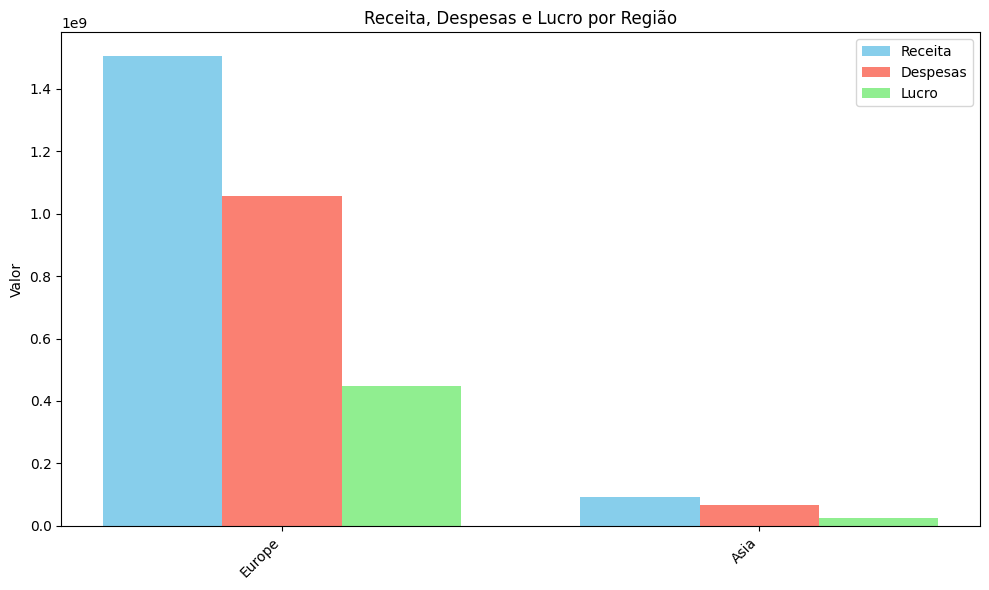

In [24]:
region_agg = df.groupby('region')[['Revenue', 'Cost', 'Profit']].sum().reset_index()
region_agg = region_agg.sort_values(by='Profit', ascending=False)

x = np.arange(len(region_agg['region']))
w = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - w, region_agg['Revenue'], w, label='Receita', color='skyblue')
rects2 = ax.bar(x, region_agg['Cost'], w, label='Despesas', color='salmon')
rects3 = ax.bar(x + w, region_agg['Profit'], w, label='Lucro', color='lightgreen')

ax.set_ylabel('Valor')
ax.set_title('Receita, Despesas e Lucro por Região')
ax.set_xticks(x)
ax.set_xticklabels(region_agg['region'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

###Vendas por Canal de Vendas

In [25]:
channel_sales = df.groupby('Sales Channel')[['Revenue', 'Cost', 'Profit']].sum().reset_index()
display(channel_sales)

,Sales Channel,Revenue,Cost,Profit
0,Offline,8.100305e+08,5.715191e+08,2.385113e+08
1,Online,7.833738e+08,5.493462e+08,2.340276e+08
2,online,5.579514e+06,4.409421e+06,1.170094e+06


In [26]:
df['Sales Channel'] = df['Sales Channel'].replace('online', 'Online')
channel_sales = df.groupby('Sales Channel')[['Revenue', 'Cost', 'Profit']].sum().reset_index()
display(channel_sales)

,Sales Channel,Revenue,Cost,Profit
0,Offline,8.100305e+08,5.715191e+08,2.385113e+08
1,Online,7.889533e+08,5.537556e+08,2.351977e+08


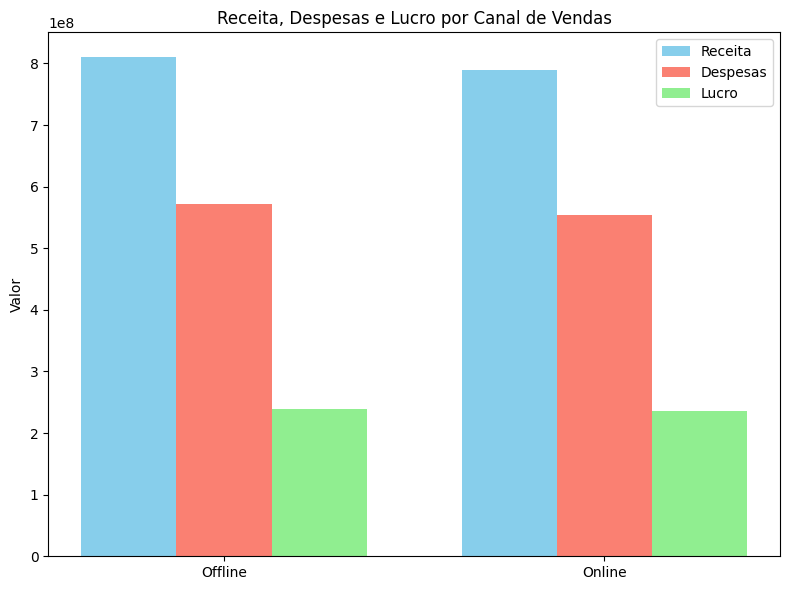

In [27]:
channel_agg = df.groupby('Sales Channel')[['Revenue', 'Cost', 'Profit']].sum().reset_index()
channel_agg = channel_agg.sort_values(by='Profit', ascending=False)

x = np.arange(len(channel_agg['Sales Channel']))
w = 0.25

fig, ax = plt.subplots(figsize=(8, 6))

rects1 = ax.bar(x - w, channel_agg['Revenue'], w, label='Receita', color='skyblue')
rects2 = ax.bar(x, channel_agg['Cost'], w, label='Despesas', color='salmon')
rects3 = ax.bar(x + w, channel_agg['Profit'], w, label='Lucro', color='lightgreen')

ax.set_ylabel('Valor')
ax.set_title('Receita, Despesas e Lucro por Canal de Vendas')
ax.set_xticks(x)
ax.set_xticklabels(channel_agg['Sales Channel'])
ax.legend()

plt.tight_layout()
plt.show()

###Popularidade de Categoria

In [28]:
product_popularity = df.groupby('item_type')['Units Sold'].sum().reset_index()
product_popularity = product_popularity.sort_values(by='Units Sold', ascending=False)
display(product_popularity)

,item_type,Units Sold
8,Office Supplies,581481.0
3,Clothes,579313.0
1,Beverages,577991.0
11,Vegetables,532510.0
5,Fruits,531135.0
9,Personal Care,530360.0
0,Baby Food,524265.0
4,Cosmetics,506188.0
7,Meat,477233.0
2,Cereal,460266.0


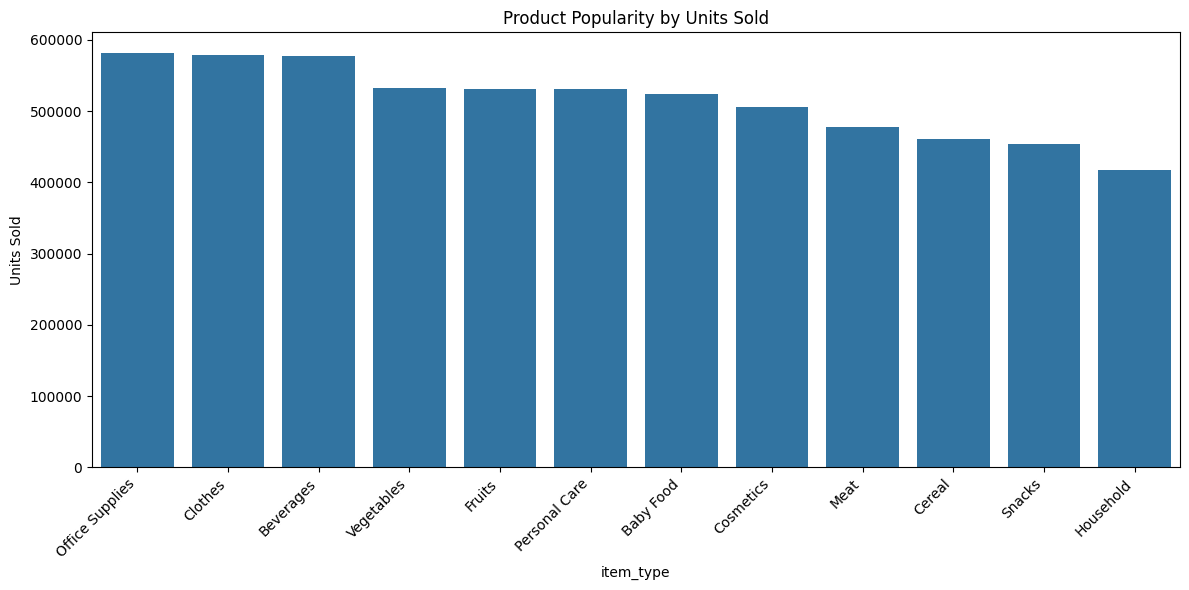

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(x='item_type', y='Units Sold', data=product_popularity)
plt.xticks(rotation=45, ha='right')
plt.title('Product Popularity by Units Sold')
plt.tight_layout()
plt.show()

###Tempo de Médio de Envio por Categoria

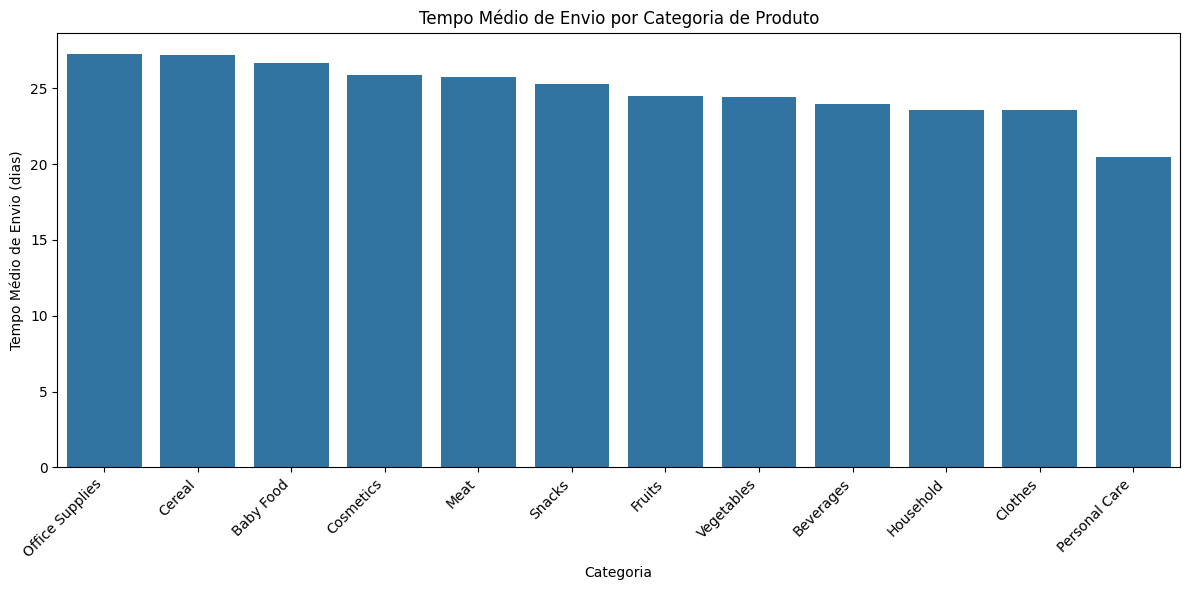

In [30]:
df['Shipping Time'] = (df['Ship Date'] - df['Order Date']).dt.days

category_shipping_time = df.groupby('item_type')['Shipping Time'].mean().reset_index()
category_shipping_time = category_shipping_time.sort_values(by='Shipping Time', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='item_type', y='Shipping Time', data=category_shipping_time)
plt.xticks(rotation=45, ha='right')
plt.title('Tempo Médio de Envio por Categoria de Produto')
plt.xlabel('Categoria')
plt.ylabel('Tempo Médio de Envio (dias)')
plt.tight_layout()
plt.show()

###Tempo de Médio de Envio por País

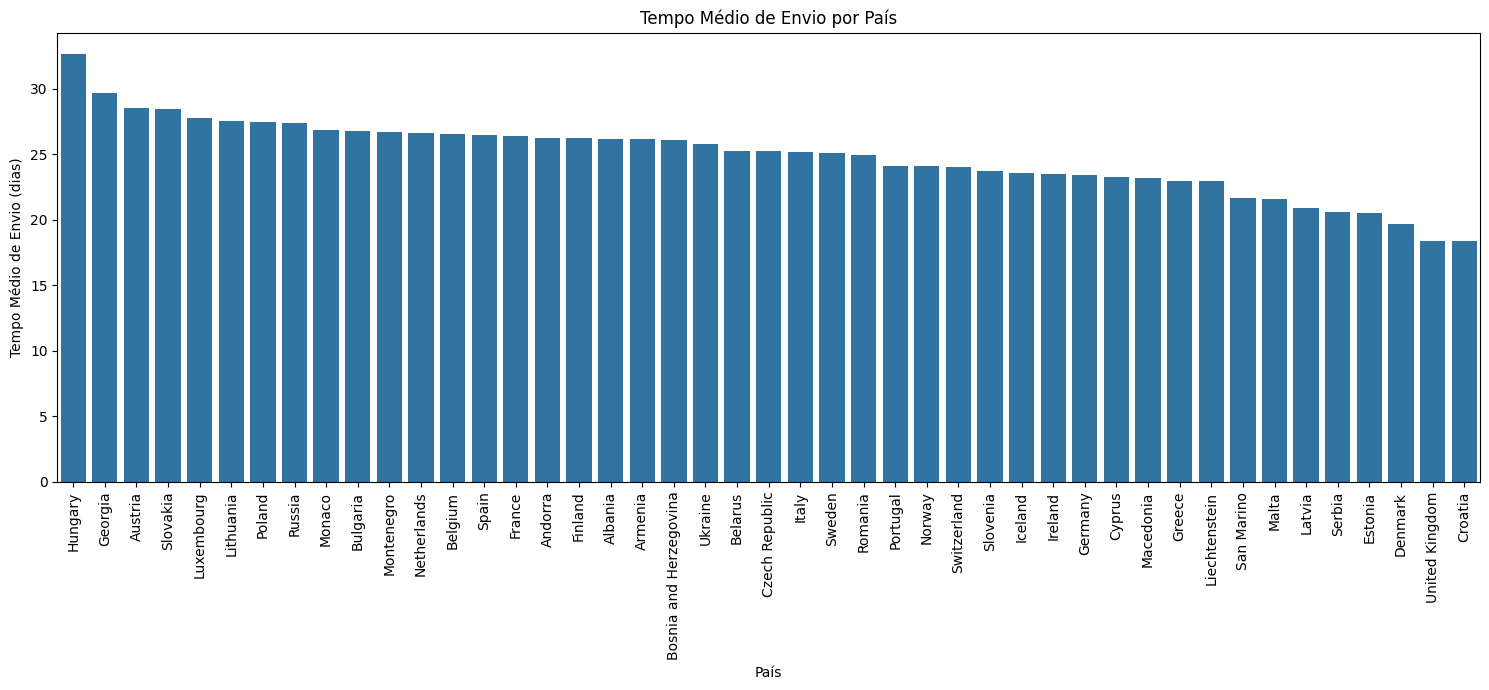

In [31]:
country_shipping_time = df.groupby('name')['Shipping Time'].mean().reset_index()
country_shipping_time = country_shipping_time.sort_values(by='Shipping Time', ascending=False)

plt.figure(figsize=(15, 7))
sns.barplot(x='name', y='Shipping Time', data=country_shipping_time)
plt.xticks(rotation=90)
plt.title('Tempo Médio de Envio por País')
plt.xlabel('País')
plt.ylabel('Tempo Médio de Envio (dias)')
plt.tight_layout()
plt.show()

###Tempo de Médio de Envio por Região

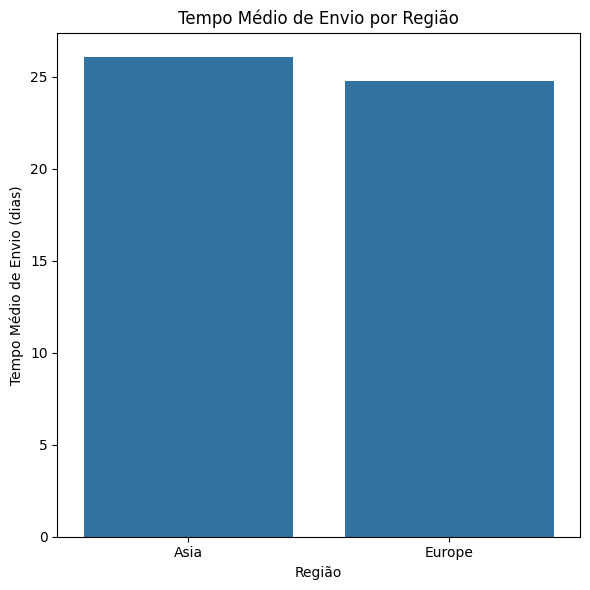

In [32]:
region_shipping_time = df.groupby('region')['Shipping Time'].mean().reset_index()
region_shipping_time = region_shipping_time.sort_values(by='Shipping Time', ascending=False)

plt.figure(figsize=(6, 6))
sns.barplot(x='region', y='Shipping Time', data=region_shipping_time)
plt.title('Tempo Médio de Envio por Região')
plt.xlabel('Região')
plt.ylabel('Tempo Médio de Envio (dias)')
plt.tight_layout()
plt.show()

###Lucro Total por Tempo de Envio

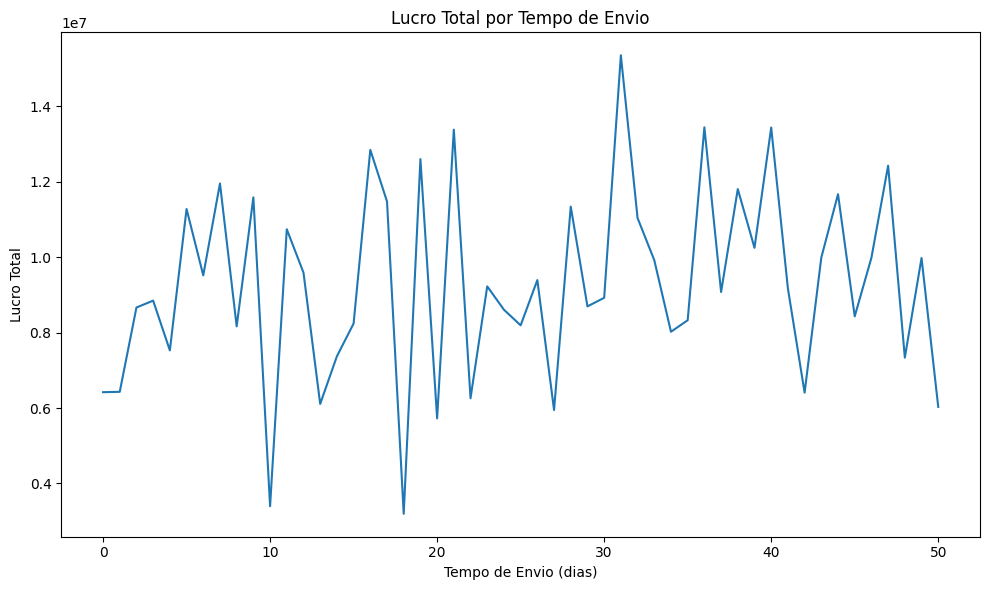

In [33]:
shipping_time_profit = df.groupby('Shipping Time')['Profit'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Shipping Time', y='Profit', data=shipping_time_profit)
plt.title('Lucro Total por Tempo de Envio')
plt.xlabel('Tempo de Envio (dias)')
plt.ylabel('Lucro Total')
plt.tight_layout()
plt.show()

###Receita por Categoria de Produto ao Longo dos Anos

In [34]:
df['OrderYear'] = df['Order Date'].dt.to_period('Y')

category_year_sales = df.groupby(['OrderYear', 'item_type'])['Revenue'].sum().reset_index()
category_year_sales['OrderYear'] = category_year_sales['OrderYear'].astype(str)

display(category_year_sales)

,OrderYear,item_type,Revenue
0,2010,Baby Food,18351313.36
1,2010,Beverages,3353101.70
2,2010,Cereal,17599280.60
3,2010,Clothes,7720304.16
4,2010,Cosmetics,24939636.80
...,...,...,...
91,2017,Meat,18445874.58
92,2017,Office Supplies,34211317.35
93,2017,Personal Care,2116071.43
94,2017,Snacks,11314417.32


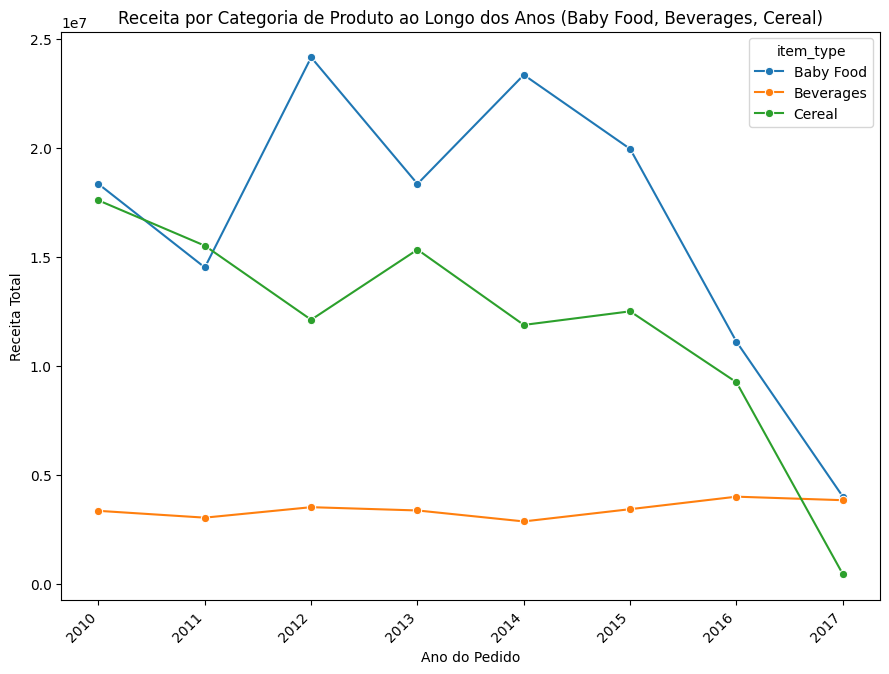

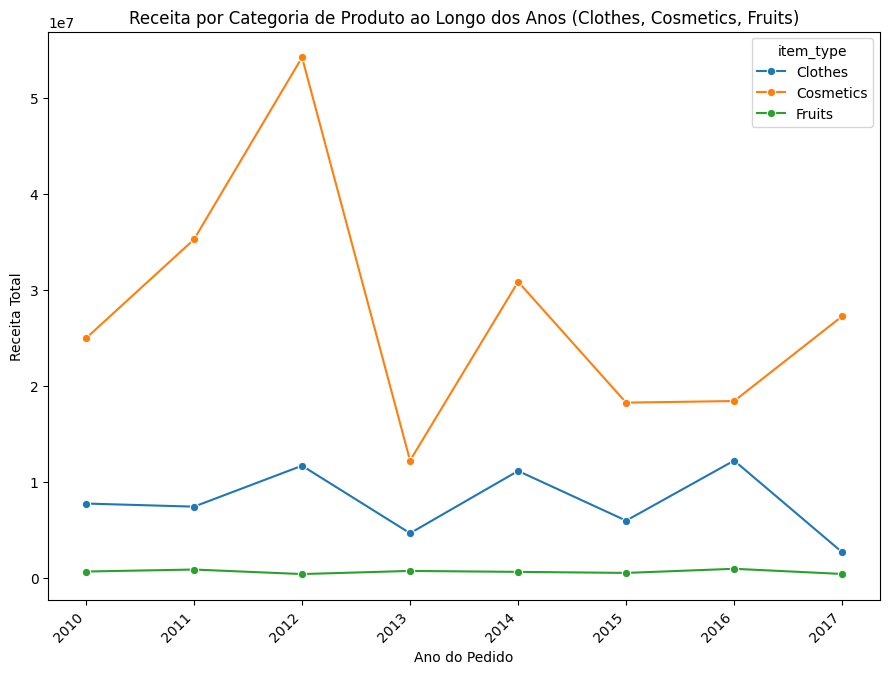

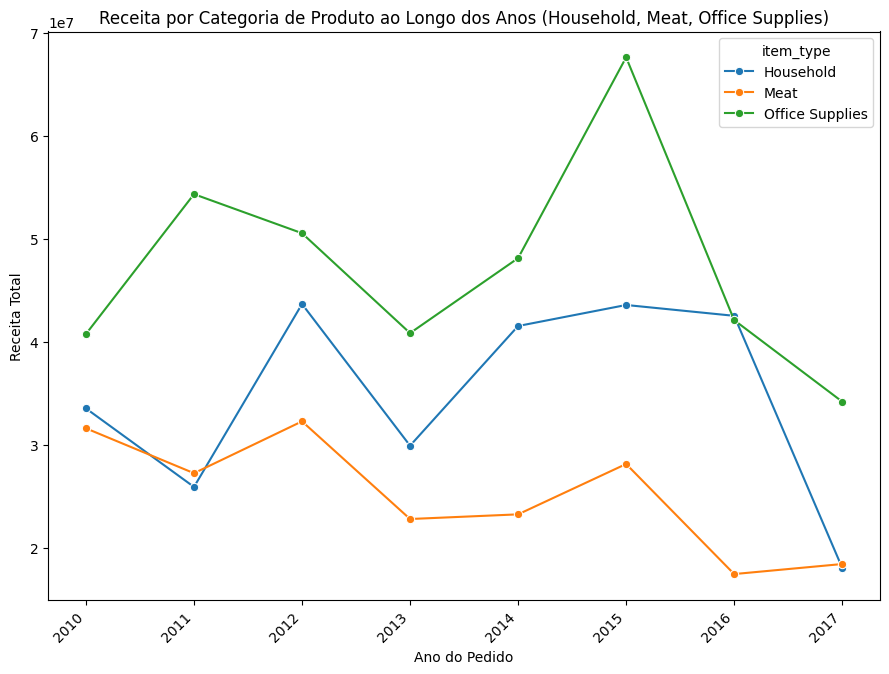

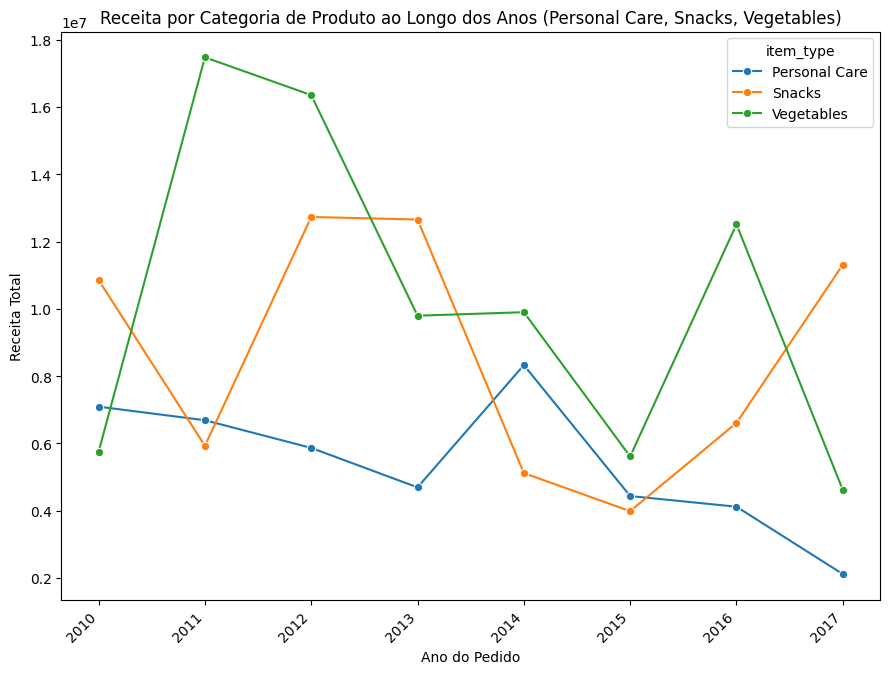

In [35]:
categories = category_year_sales['item_type'].unique()
n_categories = len(categories)
categories_per_plot = 3
n_plots = (n_categories + categories_per_plot - 1) // categories_per_plot

for i in range(n_plots):
    start_index = i * categories_per_plot
    end_index = start_index + categories_per_plot
    current_categories = categories[start_index:end_index]

    subset_data = category_year_sales[category_year_sales['item_type'].isin(current_categories)]

    plt.figure(figsize=(9, 7))
    sns.lineplot(data=subset_data, x='OrderYear', y='Revenue', hue='item_type', marker='o')
    plt.title(f'Receita por Categoria de Produto ao Longo dos Anos ({", ".join(current_categories)})')
    plt.xlabel('Ano do Pedido')
    plt.ylabel('Receita Total')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

###Receita por País ao Longo dos Anos

In [36]:
country_year_sales = df.groupby(['OrderYear', 'name'])['Revenue'].sum().reset_index()
country_year_sales['OrderYear'] = country_year_sales['OrderYear'].astype(str)

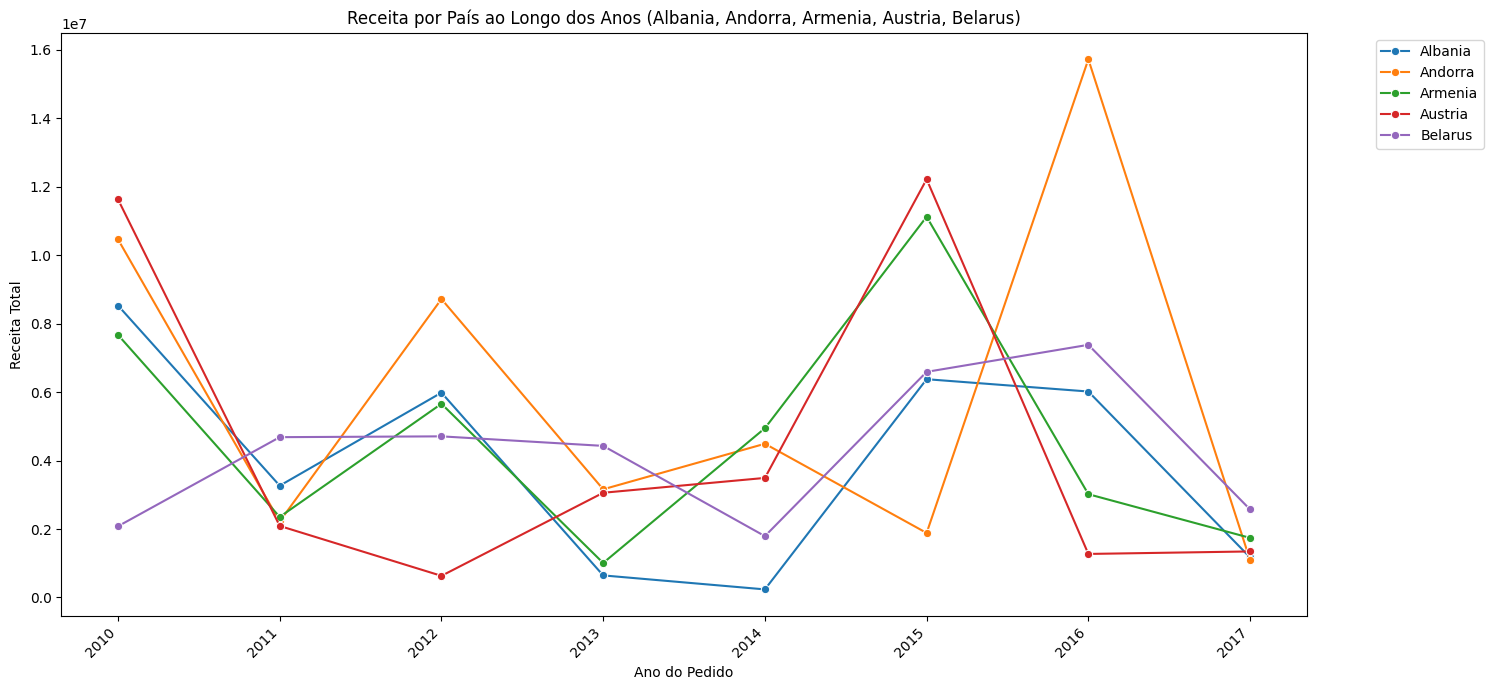

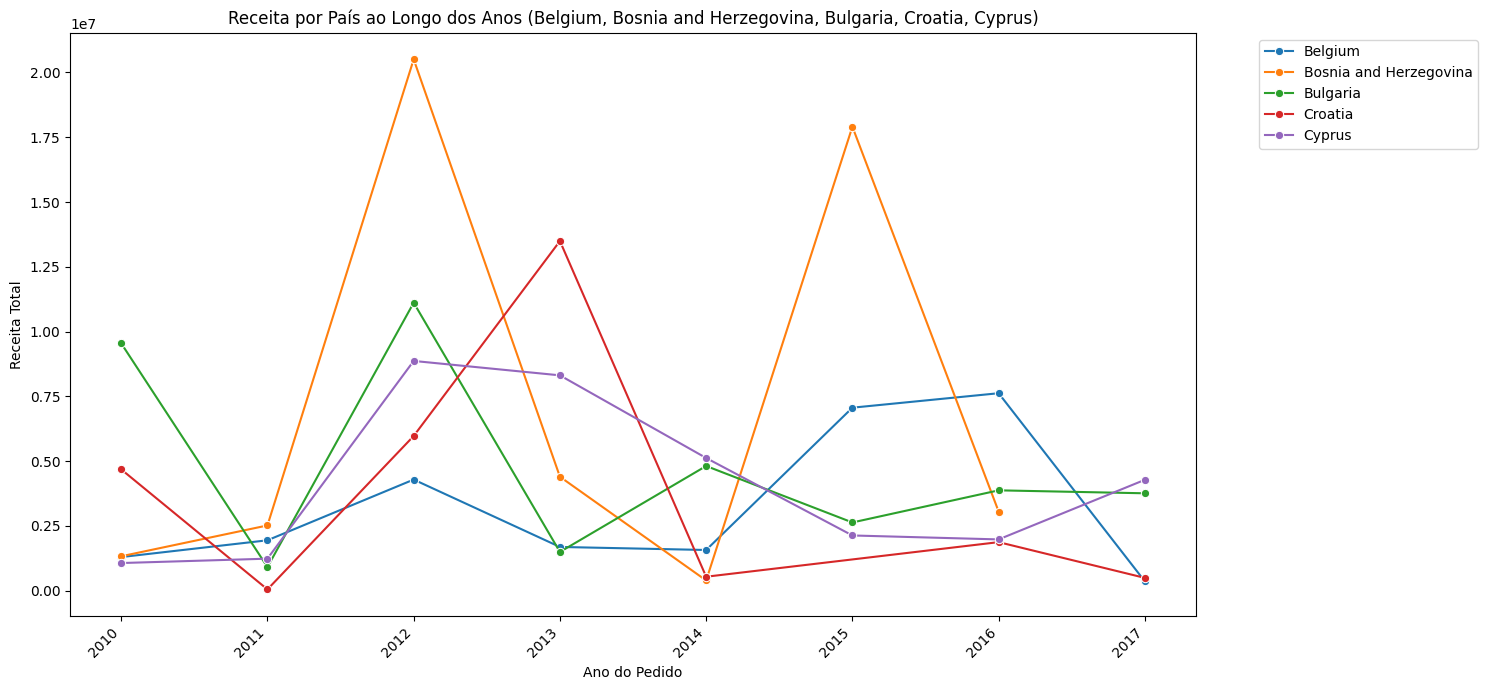

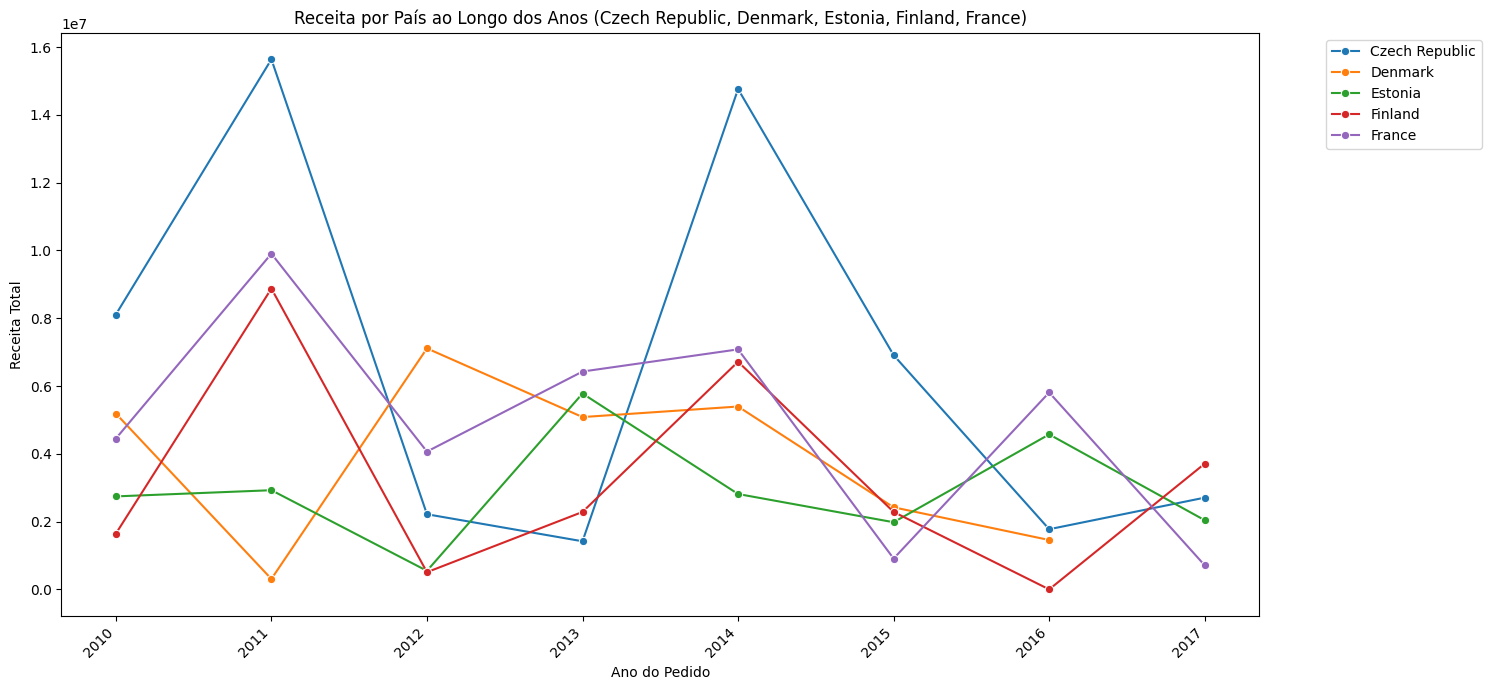

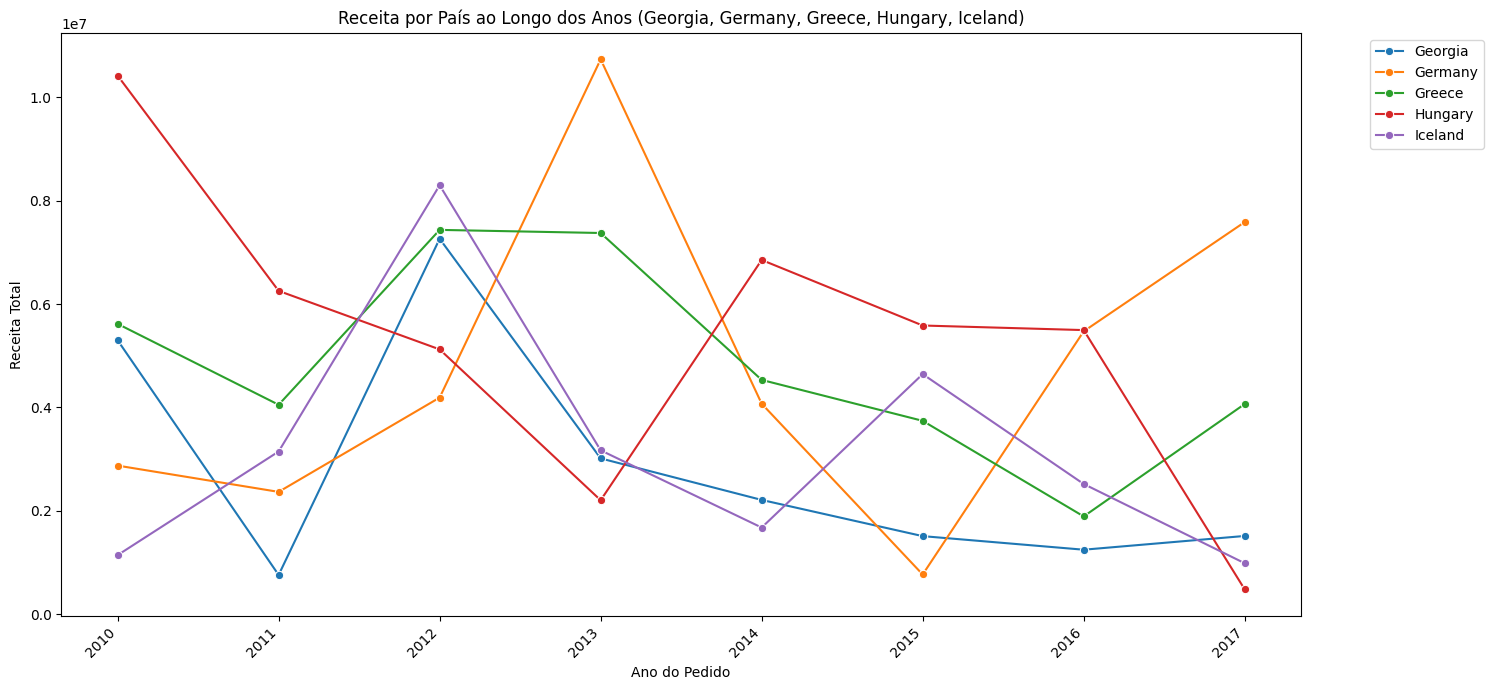

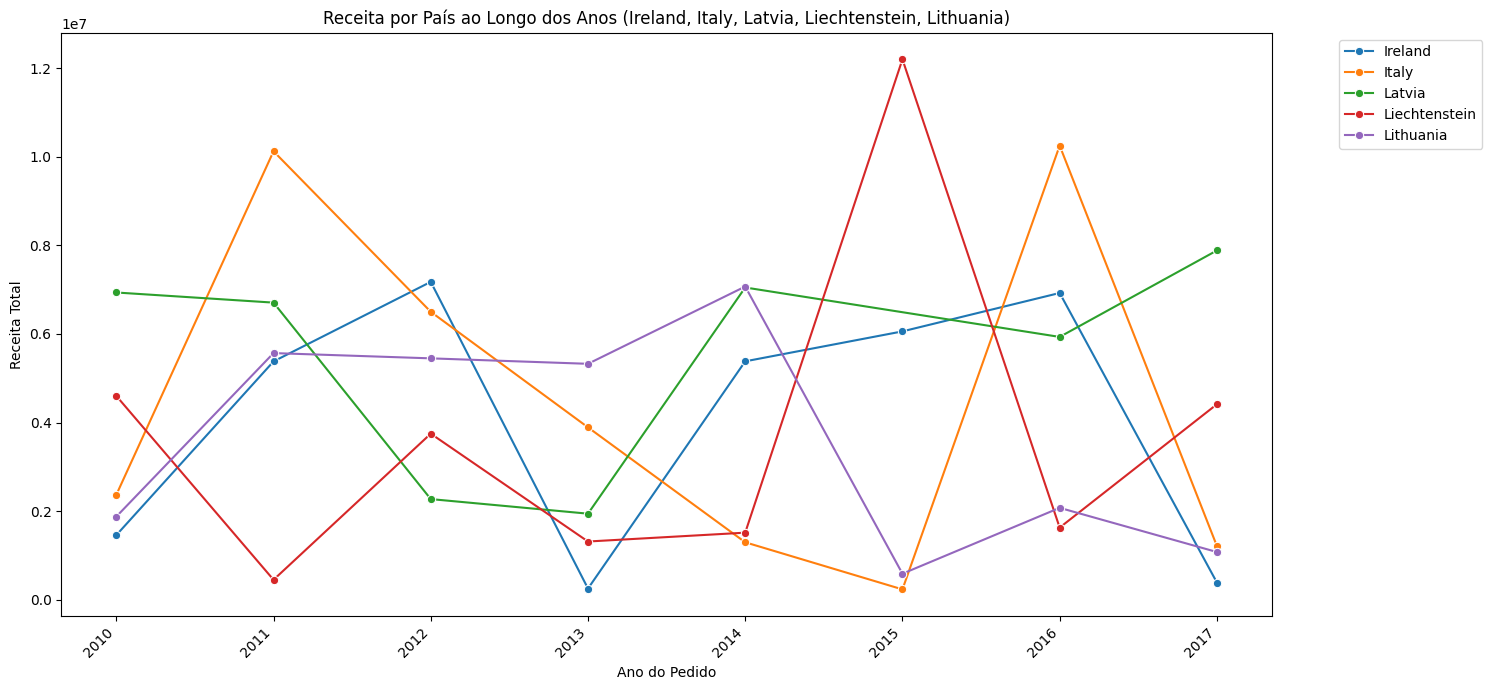

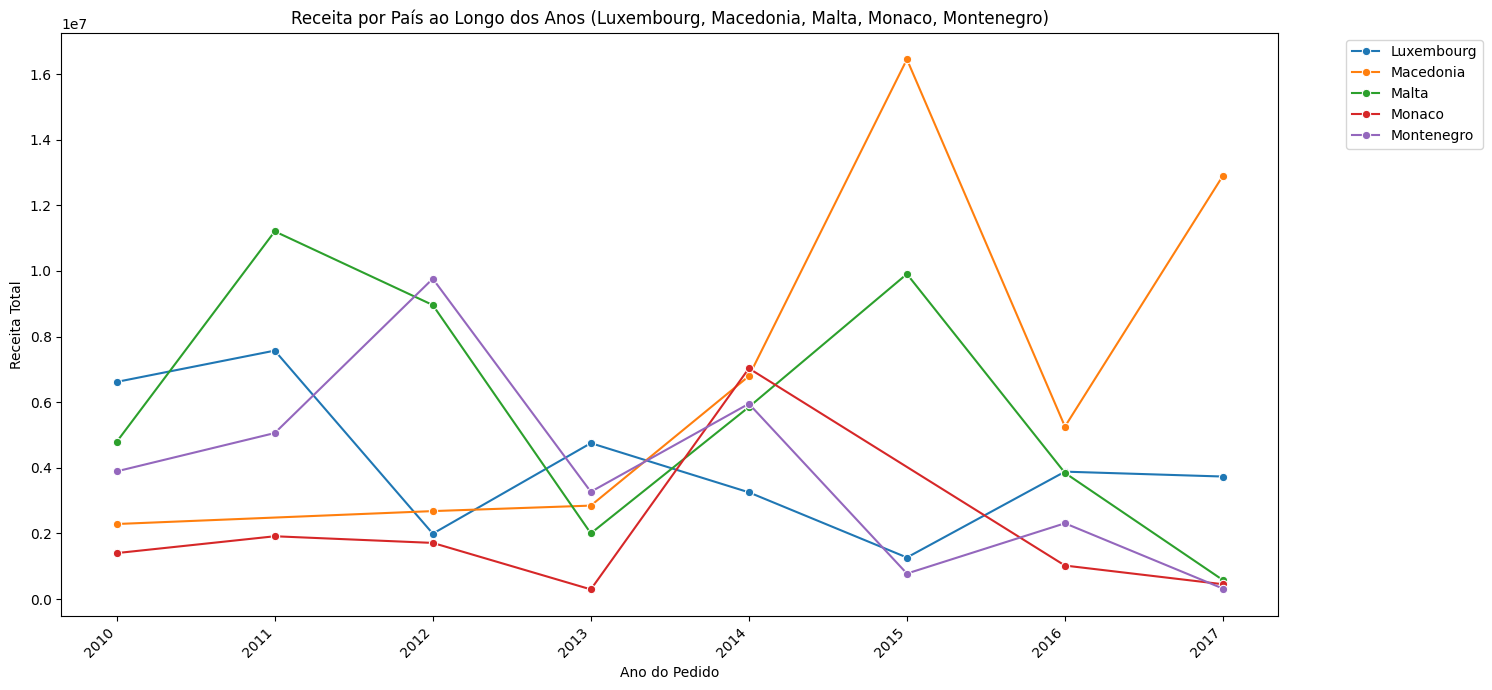

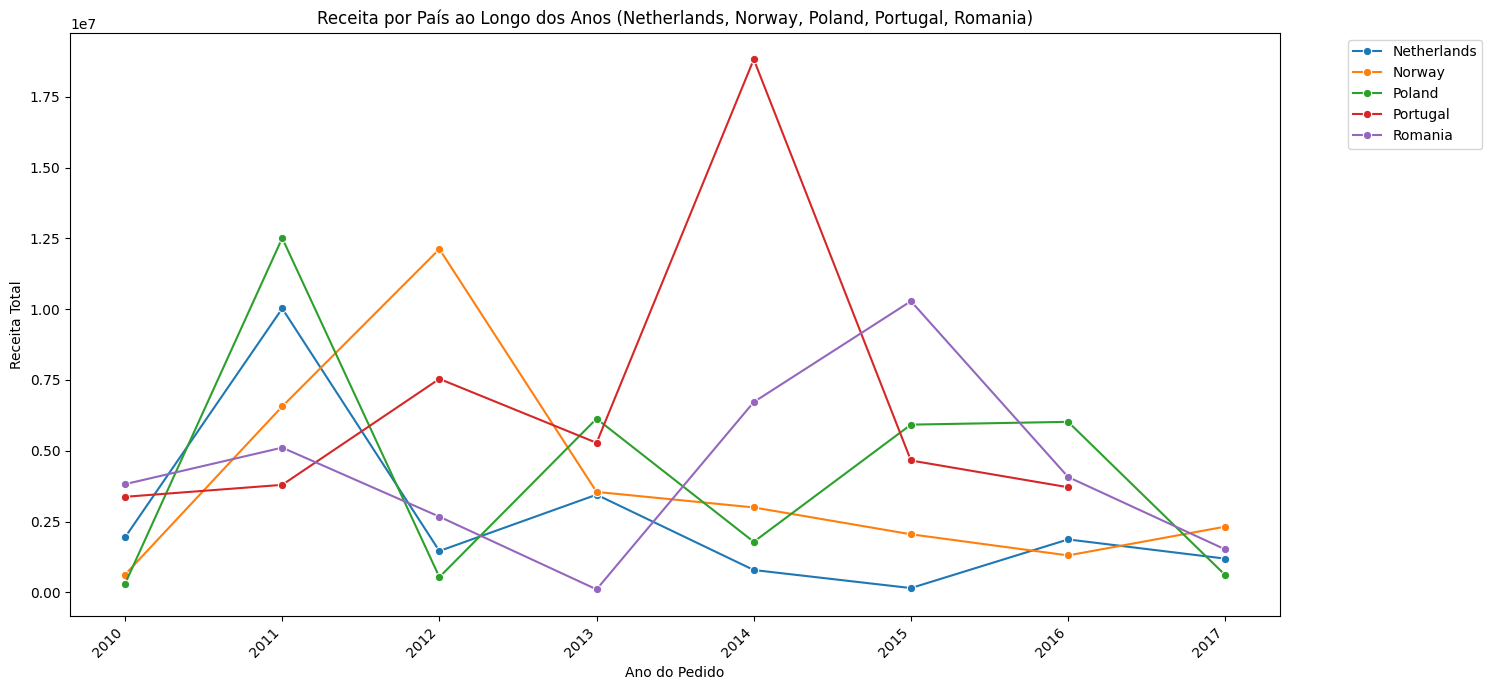

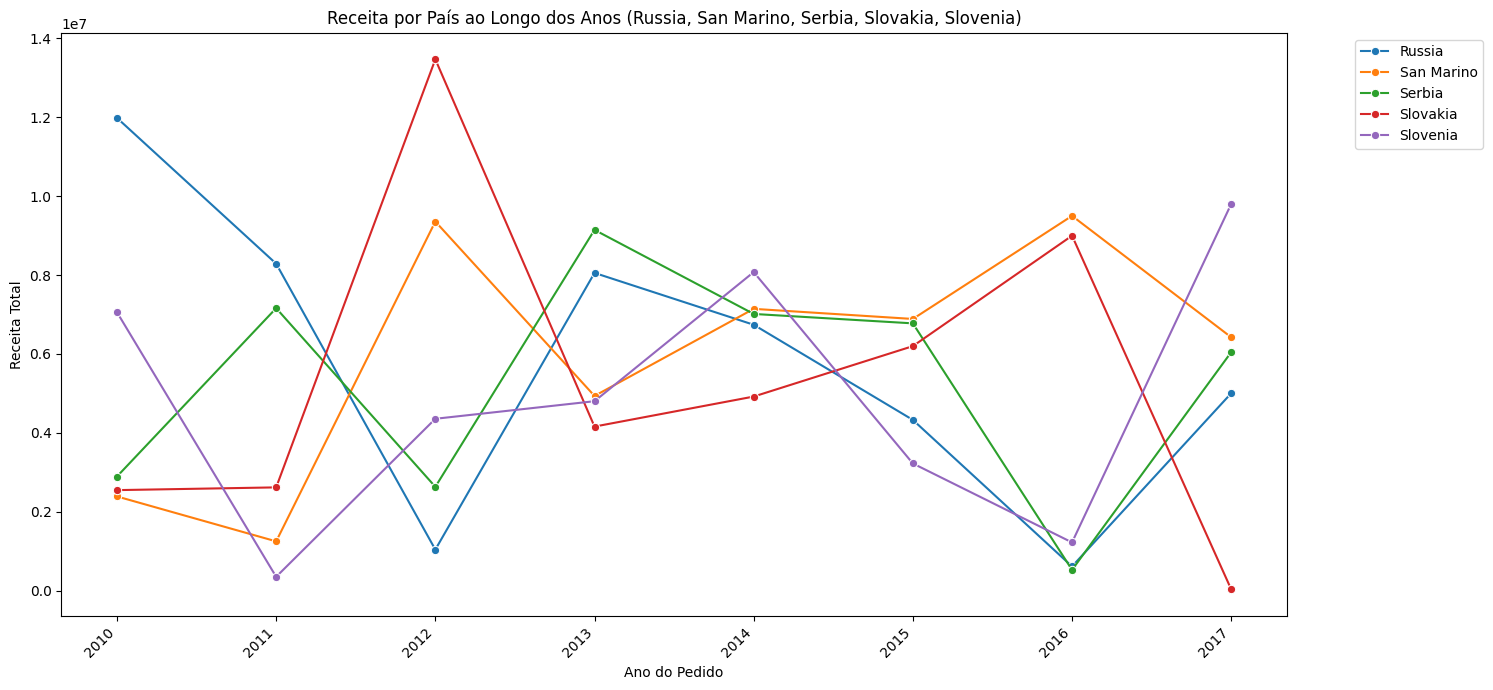

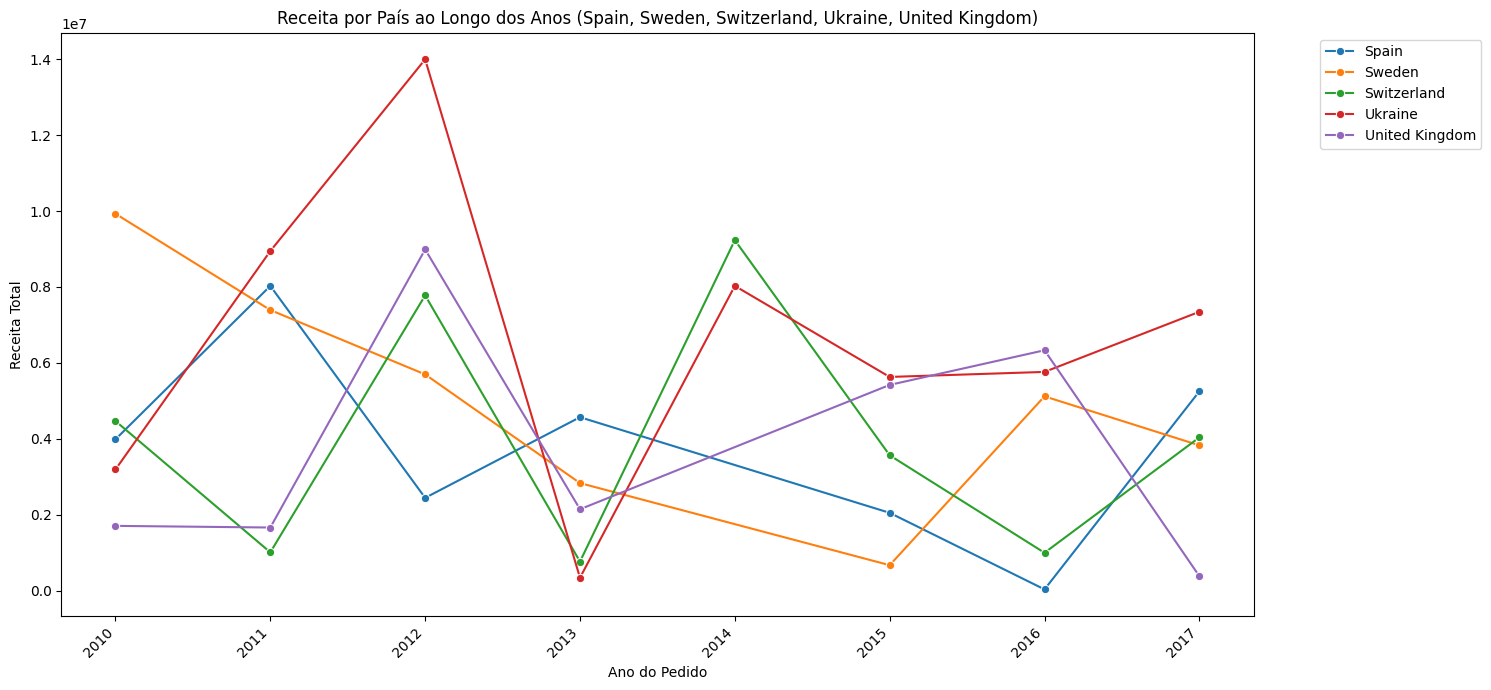

In [37]:
countries = country_year_sales['name'].unique()
n_countries = len(countries)
countries_per_plot = 5 # You can adjust this number as needed
n_plots = (n_countries + countries_per_plot - 1) // countries_per_plot

for i in range(n_plots):
    start_index = i * countries_per_plot
    end_index = start_index + countries_per_plot
    current_countries = countries[start_index:end_index]

    subset_data = country_year_sales[country_year_sales['name'].isin(current_countries)]

    plt.figure(figsize=(15, 7))
    sns.lineplot(data=subset_data, x='OrderYear', y='Revenue', hue='name', marker='o')
    plt.title(f'Receita por País ao Longo dos Anos ({", ".join(current_countries)})')
    plt.xlabel('Ano do Pedido')
    plt.ylabel('Receita Total')
    plt.xticks(rotation=45, ha='right')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

###Receita por Região ao Longo dos Anos

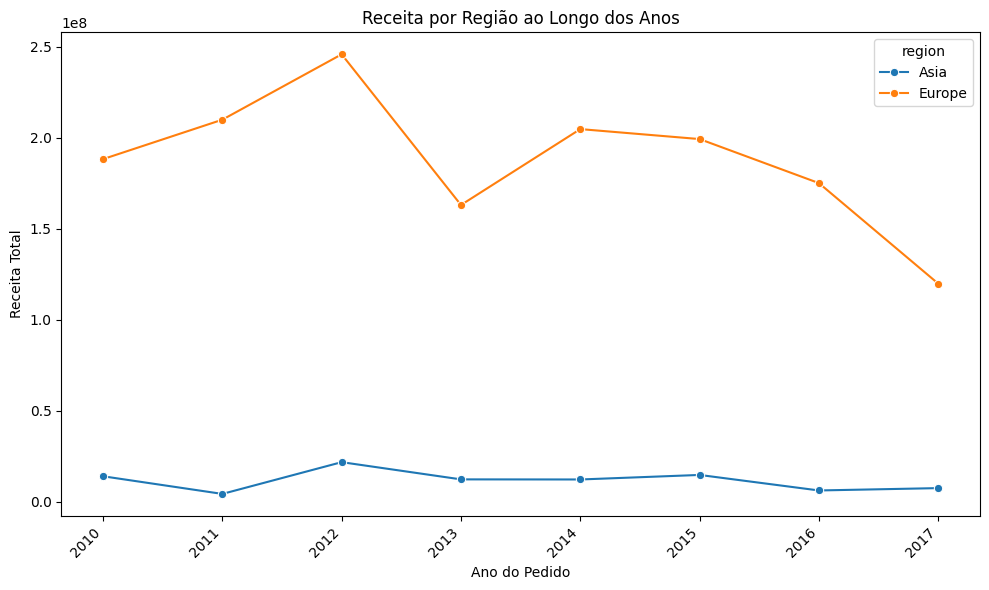

In [38]:
region_year_sales = df.groupby(['OrderYear', 'region'])['Revenue'].sum().reset_index()
region_year_sales['OrderYear'] = region_year_sales['OrderYear'].astype(str)

plt.figure(figsize=(10, 6))
sns.lineplot(data=region_year_sales, x='OrderYear', y='Revenue', hue='region', marker='o')
plt.title('Receita por Região ao Longo dos Anos')
plt.xlabel('Ano do Pedido')
plt.ylabel('Receita Total')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###Distribuição de vendas por dia da semana (Categorias)

<Figure size 1500x800 with 0 Axes>

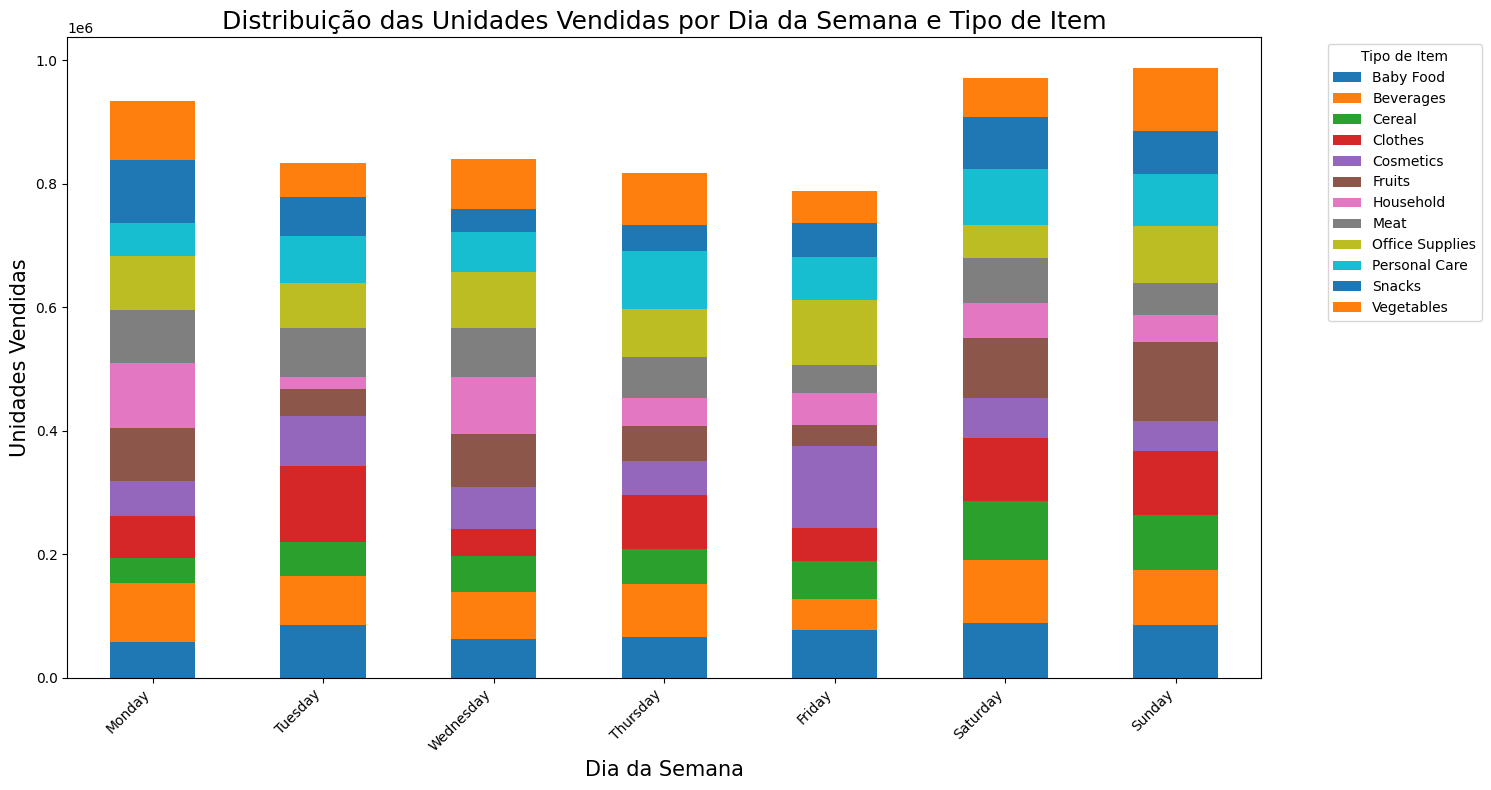

In [39]:
df['OrderDayOfWeek'] = df['Order Date'].dt.day_name()

sales_by_day_item = df.groupby(['OrderDayOfWeek', 'item_type'])['Units Sold'].sum().unstack(fill_value=0)

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day_item = sales_by_day_item.reindex(days_order)

plt.figure(figsize=(15, 8))
sales_by_day_item.plot(kind='bar', stacked=True, figsize=(15, 8))

plt.title('Distribuição das Unidades Vendidas por Dia da Semana e Tipo de Item', fontsize=18)
plt.xlabel('Dia da Semana', fontsize=15)
plt.ylabel('Unidades Vendidas', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Item', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()